In [0]:
import tensorflow.keras as keras
import pandas as pd
import numpy as np
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# get the data
filname = '/content/drive/My Drive/Colab Notebooks/fer2013.csv'
label_map = ['Anger', 'Neutral', 'Fear', 'Happy', 'Sad', 'Surprise']
names=['emotion','pixels','usage']
df=pd.read_csv(filname, names=names, na_filter=False)
im=df['pixels']

In [38]:
Y = []
X = []
first = True
for line in open(filname):
    if first:
        first = False
    else:
        row = line.split(',')
        Y.append(int(row[0]))
        X.append([int(p) for p in row[1].split()])
X, Y = np.array(X), np.array(Y)
print(X.shape)
print(Y.shape)

(35887, 2304)
(35887,)


In [0]:
X = X.reshape(X.shape[0], 48, 48, 1)

In [0]:
Y[Y == 1] = 0
Y[Y == 6] = 1

1


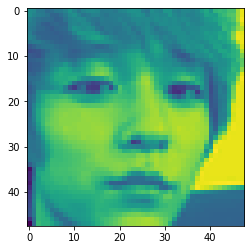

In [41]:
import matplotlib.pyplot as plt
plt.imshow(X[13].reshape(48, 48))
print(Y[13])

In [42]:
from sklearn.model_selection import train_test_split

training_exp, testing_exp, training_labels, testing_labels = train_test_split(X, Y, test_size=0.1, random_state=0)
print(training_exp.shape)
print(training_labels.shape)

(32298, 48, 48, 1)
(32298,)


In [0]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), input_shape=(48, 48, 1), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3, 3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(256, (3, 3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(512),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(6, activation='softmax')
])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_8 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_8 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 128)      

In [0]:
adam = keras.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
test_datagen  = ImageDataGenerator(rescale=1./255)

In [47]:
batch_size = 48
steps_per_epoch = int(training_exp.shape[0]/batch_size)
validation_steps = int(testing_exp.shape[0]/batch_size)
epochs = 40

model_cbk = keras.callbacks.ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/checkpoint.h5', monitor='val_accuracy', save_best_only=True)
lr_red = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, factor=0.5)

history = model.fit(train_datagen.flow(training_exp, training_labels, batch_size=batch_size), steps_per_epoch=steps_per_epoch, validation_data=test_datagen.flow(testing_exp, testing_labels, batch_size=batch_size), validation_steps=validation_steps, epochs=epochs, callbacks=[model_cbk, lr_red])

Epoch 1/40
672/672 [==============================] - 18s 26ms/step - loss: 1.7274 - accuracy: 0.3015 - val_loss: 1.4875 - val_accuracy: 0.4079 - lr: 0.0050
Epoch 2/40
672/672 [==============================] - 18s 27ms/step - loss: 1.4416 - accuracy: 0.4314 - val_loss: 1.3605 - val_accuracy: 0.4606 - lr: 0.0050
Epoch 3/40
672/672 [==============================] - 18s 27ms/step - loss: 1.3044 - accuracy: 0.4874 - val_loss: 1.3258 - val_accuracy: 0.4716 - lr: 0.0050
Epoch 4/40
672/672 [==============================] - 19s 28ms/step - loss: 1.2341 - accuracy: 0.5231 - val_loss: 1.2342 - val_accuracy: 0.5090 - lr: 0.0050
Epoch 5/40
672/672 [==============================] - 17s 26ms/step - loss: 1.1857 - accuracy: 0.5392 - val_loss: 1.5809 - val_accuracy: 0.4074 - lr: 0.0050
Epoch 6/40
672/672 [==============================] - 18s 26ms/step - loss: 1.1542 - accuracy: 0.5551 - val_loss: 1.1821 - val_accuracy: 0.5422 - lr: 0.0050
Epoch 7/40
672/672 [==============================] - 17s 

In [48]:
testing_exp_resized = testing_exp/255.0
model.evaluate(testing_exp_resized, testing_labels)

113/113 [==============================] - 0s 4ms/step - loss: 0.9930 - accuracy: 0.6746


[0.9929898977279663, 0.6745611429214478]

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/emot.h5')

In [49]:
mdl = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/checkpoint.h5')
testing_exp_resized = testing_exp/255.0
mdl.evaluate(testing_exp_resized, testing_labels)

113/113 [==============================] - 0s 4ms/step - loss: 0.9602 - accuracy: 0.6851


[0.9601606726646423, 0.685149073600769]